## Strategy Comparison

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('src')

from Strategy import Strategy, StrategyResult
from BenchmarkStrategy import BenchmarkStrategy
from MovingAverageStrategy import MovingAverageStrategy
from VolatilityBreakoutStrategy import VolatilityBreakoutStrategy
from MACDStrategy import MACDStrategy
from RSIStrategy import RSIStrategy
from PriceLoader import PriceLoader

In [3]:
prices = PriceLoader('data').load_all()
strategies = {
    "Benchmark": BenchmarkStrategy().run(prices),
    "Moving Average": MovingAverageStrategy().run(prices),
    "Volatility Breakout": VolatilityBreakoutStrategy().run(prices),
    "MACD": MACDStrategy().run(prices),
    "RSI": RSIStrategy().run(prices)
}

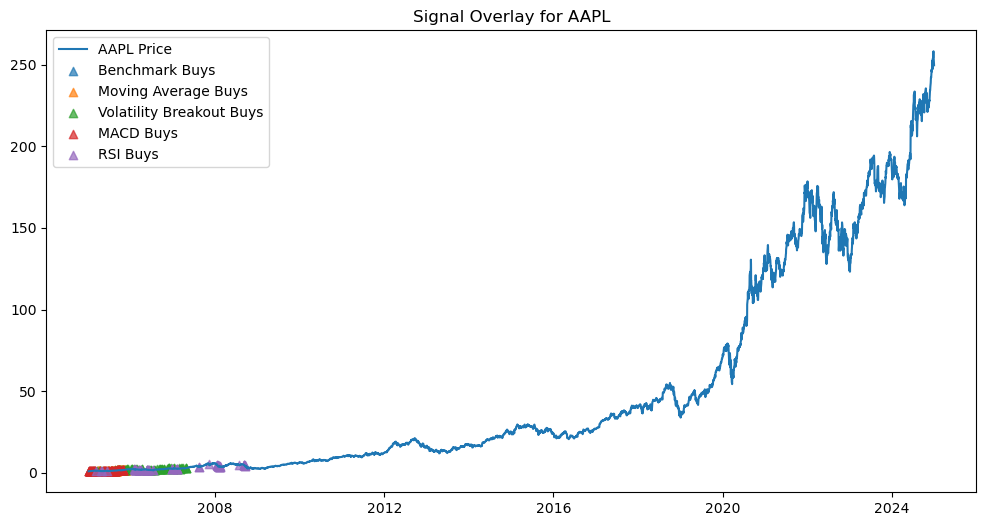

In [4]:
# Signal overlay on price chart (default ticker=AAPL; feel free to change to other ones, though)
ticker = "AAPL"
plt.figure(figsize=(12,6))
plt.plot(prices[ticker], label=f"{ticker} Price")

for name, res in strategies.items():
    mask = res.positions[ticker].diff().fillna(res.positions[ticker]).gt(0)
    plt.scatter(prices.index[mask],
                prices[ticker][mask],
                marker='^', alpha=0.7, label=f'{name} Buys')

plt.title(f'Signal Overlay for {ticker}')
plt.legend()
plt.show()

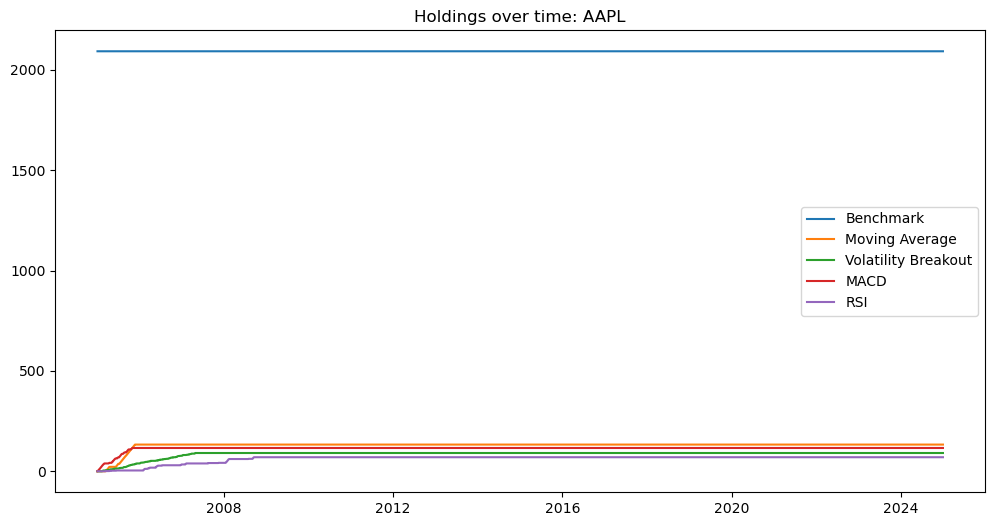

In [5]:
# Holdings over time
plt.figure(figsize=(12,6))
for name, res in strategies.items():
    plt.plot(res.positions[ticker], label=name)
plt.title(f"Holdings over time: {ticker}")
plt.legend()
plt.show()

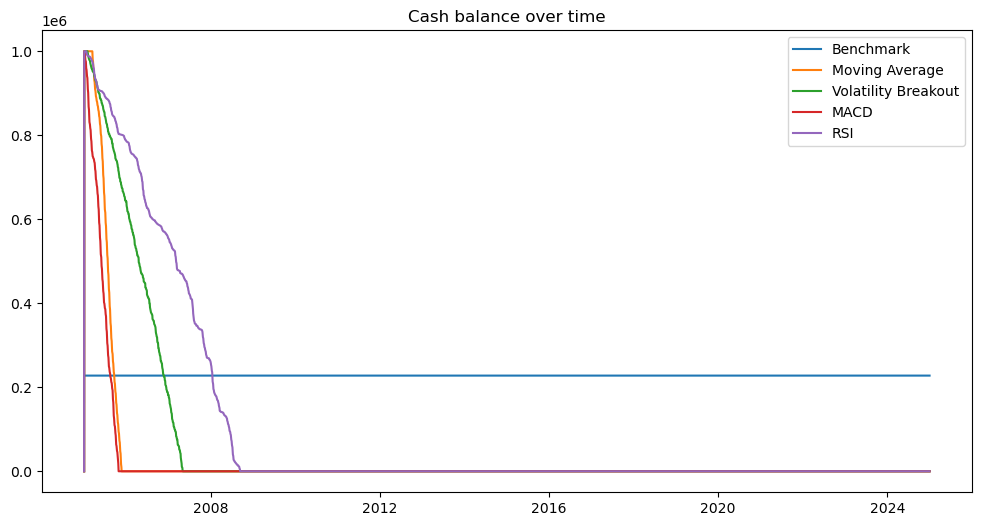

In [6]:
# Cash balance
plt.figure(figsize=(12,6))
for name, res in strategies.items():
    plt.plot(res.cash, label=name)
plt.title("Cash balance over time")
plt.legend()
plt.show()

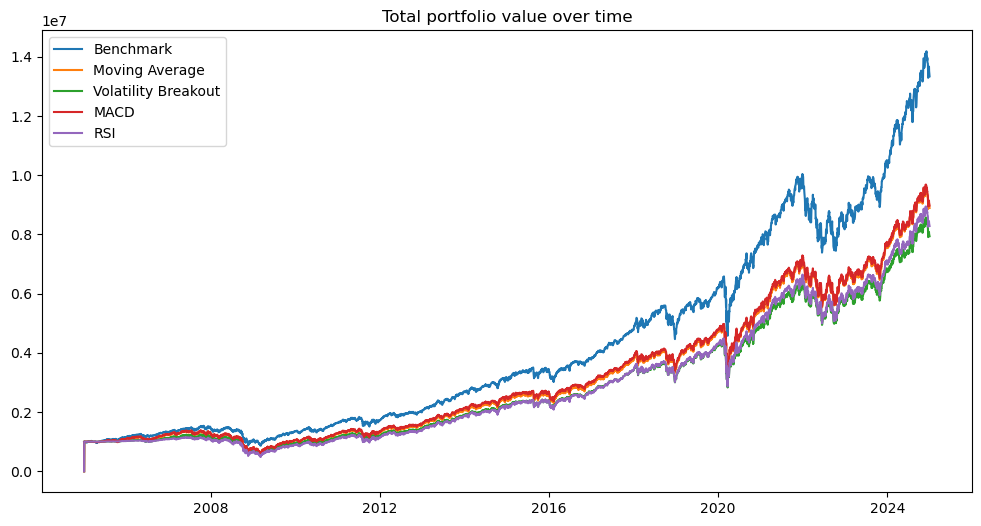

In [7]:
# Total portfolio value
plt.figure(figsize=(12,6))
for name, res in strategies.items():
    plt.plot(res.port_val, label=name)
plt.title("Total portfolio value over time")
plt.legend()
plt.show()

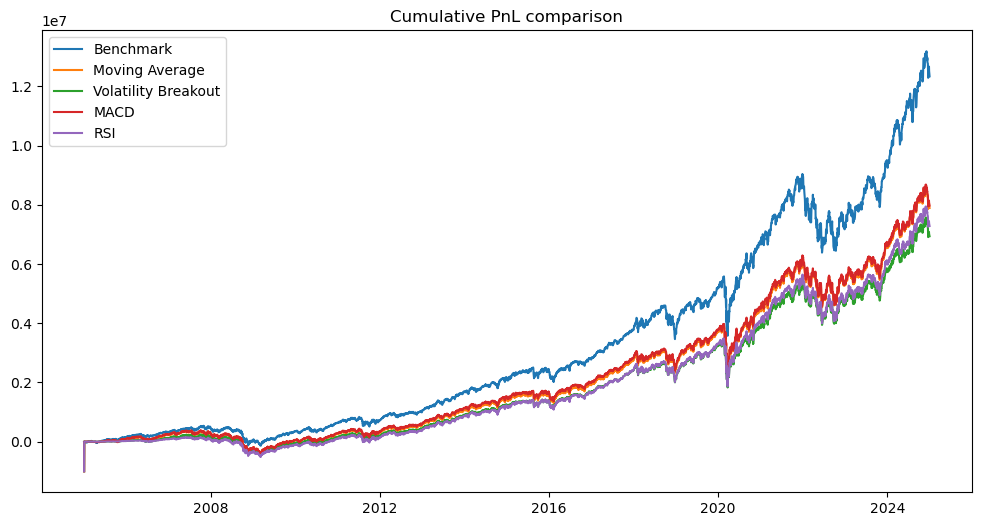

In [8]:
# Cumulative PnL comparison
plt.figure(figsize=(12,6))
for name, res in strategies.items():
    plt.plot(res.cum_pnl, label=name)
plt.title("Cumulative PnL comparison")
plt.legend()
plt.show()